In [1]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET 
import math
from geopy import distance
from math import cos, sqrt
import sys
import json
import folium
import seaborn as sns
%matplotlib inline

# A. Station's location data set

In [2]:
# the data is also stored in master_thesis/SampleData/bikelocations_london.csv
station_df=pd.read_csv("/bigdata/tara/bikelocations_london.csv")
station_df.head()

,system,ucl_id,operator_intid,operator_altid,operator_name,notes,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,updated_dt_nonzerobikes,pedelec,operator_installflag,operator_lockflag,operator_tempflag
0,london,428,428,428,"Exhibition Road Museums, Knightsbridge",NaN,51.499917,-0.174554,0,20,0,20,2018-04-26 23:00:03,2018-04-26 23:00:03,NaN,0,1,0,0
1,london,86,86,86,Vauxhall*,NaN,51.489479,-0.115157,5,24,5,24,2015-02-13 18:02:36,2015-02-13 18:02:36,2015-02-13 18:02:36,0,1,0,0
2,london,108,108,108,"Abbey Orchard Street, Westminster",NaN,51.498126,-0.132102,17,29,4,29,2010-08-06 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
3,london,559,559,559,"Abbotsbury Road, Holland Park",NaN,51.501391,-0.205991,20,24,4,24,2013-07-09 11:26:09,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
4,london,394,394,394,"Aberdeen Place, St. John's Wood",NaN,51.524826,-0.176268,0,17,1,18,2011-06-29 15:40:02,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0


In [3]:
popular_stations=[ 101, 579, 340, 136,  557, 48, 509, 126, 55, 275,427]
Stations=popular_stations

station_df[station_df['ucl_id'].isin(Stations)]

,system,ucl_id,operator_intid,operator_altid,operator_name,notes,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,updated_dt_nonzerobikes,pedelec,operator_installflag,operator_lockflag,operator_tempflag
56,london,340,340,340,"Bank of England Museum, Bank",NaN,51.514441,-0.087587,11,16,4,16,2010-10-08 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
58,london,275,275,275,"Barbican Centre, Barbican",NaN,51.520045,-0.092176,13,19,10,19,2010-08-06 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
187,london,427,427,427,"Cheapside, Bank",NaN,51.513971,-0.092940,24,43,10,43,2011-08-16 12:12:53,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
335,london,55,55,55,"Finsbury Circus, Liverpool Street",NaN,51.517075,-0.086686,6,32,30,33,2010-08-06 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
347,london,509,0,0,"Fore Street Avenue, Guildhall",Added from csv snapshot file s3_201203,51.517842,-0.090075,16,19,16,19,2012-03-12 11:20:17,2012-03-12 11:20:17,2012-03-12 11:20:17,0,1,0,0
350,london,509,509,509,"Fore Street, Guildhall",NaN,51.517842,-0.090075,19,19,10,19,2013-07-09 11:26:09,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
386,london,48,48,48,"Godliman Street, St. Paul's",NaN,51.512484,-0.099141,11,25,11,25,2010-08-06 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
540,london,557,557,557,"King Edward Street, St Pauls",NaN,51.516010,-0.098500,19,20,10,20,2013-07-09 11:26:09,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0
541,london,557,0,0,"King Edward Street, St Pauls",Added from csv snapshot file s3_201203,51.516204,-0.098523,17,20,17,20,2012-03-12 11:20:17,2012-03-12 11:20:17,2012-03-12 11:20:17,0,1,0,0
667,london,126,126,126,"Museum of London, Barbican",NaN,51.517821,-0.096497,35,52,32,52,2010-08-06 01:00:00,2020-02-14 17:38:02,2020-02-14 17:38:02,0,1,0,0


In [4]:
station_df=station_df.drop(['notes','system','updated_dt_nonzerobikes','pedelec','operator_installflag'
                ,'operator_lockflag','operator_tempflag'],axis=1)

In [5]:
station_df.ucl_id.nunique()

818

In [6]:
max(station_df.ucl_id)

839

In [7]:
min(station_df.ucl_id)

1

In [8]:
#keep the rows where change has been done before 2019 (one station is removed here)
station_df['created_dt']=pd.to_datetime(station_df['created_dt'])
station_df=station_df[station_df['created_dt'].dt.year!=2019]
station_df=station_df[station_df['created_dt'].dt.year!=2020]

In [9]:
#the operator_ids range from 1 to 839 but there is no record for some of them in the data set(2018 station observation)
#So we want to remove this stations from our station_data
black_list=[385, 391, 137, 525, 147, 406, 407, 791, 285, 414, 413, 415, 416,417,418, 35, 422, 555, 429, 434, 179, 438, 567,
 822, 823, 824, 59, 316, 825, 575, 705, 834, 837, 198, 582, 585, 205, 342, 346, 493, 241, 369, 502]
len(black_list)

43

In [10]:
# in the map: 137, 834
#curr size is zero: 791,822,823,824,205,147,525,391
#555,179,59,316(one row which is in year 2019 is in the map),705,369,502(one row which is in year 2019 is in the map),35,407,406
# 406 and 407 are the same name and location but none found in observation? 
# 285,241 is wired
#empty : 385,414, 413, 415, 416,417,418, 429, 434,438, 567,825,575,837,198,582,585,342,346,493

In [11]:
station_df=station_df[~station_df.ucl_id.isin(black_list)]
station_df.ucl_id.nunique()

796

In [12]:
#170 stations have more than one entry in the data set
station_df[station_df.duplicated('ucl_id')==True]

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt
7,583,583,583,"Abingdon Green, Westminster",51.497622,-0.125978,13,20,4,20,2015-05-21 14:46:02,2020-02-14 17:38:02
15,540,540,540,"Albany Street, The Regent's Park",51.528302,-0.144466,6,27,4,27,2015-05-21 14:52:01,2020-02-14 17:38:02
28,826,0,0,"Allington Street, Victoria",51.496863,-0.142943,25,28,26,28,2018-08-29 11:02:03,2020-02-14 17:38:02
29,826,826,826,"Allington street, Westminster",51.496863,-0.142943,2,28,24,28,2017-07-20 13:52:01,2018-08-29 11:00:04
30,826,826,826,"Allington street, Westminster, SW1E 5EB",51.496863,-0.142943,0,0,2,28,2017-06-07 11:46:02,2017-07-20 13:50:02
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,154,154,154,"Waterloo Station 3, Waterloo",51.503792,-0.112824,7,34,30,35,2011-06-29 15:40:02,2020-02-14 17:38:02
1091,360,0,0,"Waterloo Station 3, Waterloo",51.503792,-0.112824,0,35,0,35,2011-02-01 00:00:00,2011-02-01 00:00:00
1130,175,175,175,"Worship Street, Hackney",51.521773,-0.081119,22,26,12,26,2018-06-22 14:46:02,2018-08-29 10:58:03
1132,175,0,0,"Worship Street, Shoreditch",51.521773,-0.081119,12,26,24,51,2018-08-29 11:00:03,2019-04-26 11:48:03


In [13]:
# we sort based on last update to keep the most recent situation(size and location ) of the station
station_df['updated_dt']=pd.to_datetime(station_df['updated_dt'])
station_df=station_df.sort_values(by='updated_dt',ascending=False)
station_df=station_df.drop_duplicates("ucl_id", keep="first").reset_index(drop=True)
#station_df.head()

In [14]:
#All of these stations the current size is set to zero but they were available during 2018(mistake in data??!!)
station_df[station_df['curr_size']==0]['ucl_id'].unique()

array([794, 808, 487, 400, 161, 805, 752, 539, 290, 474, 753, 818, 788,
       224, 659, 672, 725])

In [15]:
station_df[station_df.ucl_id==808]

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt
768,808,808,808,"Stockwell Roundabout, Stockwell",51.473486,-0.122556,0,33,0,0,2016-04-05 15:22:01,2020-02-04 11:12:02


In [16]:
for index,row in station_df.iterrows():
    if row['curr_size']==0:
        station_df.loc[index,'curr_size']=row['initial_size']

In [ ]:
station_df.to_csv()

### Min and Max capacity station

In [17]:
station_df.curr_size.min()

10

In [18]:
station_df[station_df.curr_size==10]

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt
210,250,250,250,"Royal Avenue 1, Chelsea",51.489932,-0.162727,6,10,7,10,2010-08-06 01:00:00,2020-02-14 17:38:02
211,280,280,280,"Royal Avenue 2, Chelsea",51.490083,-0.162418,2,10,2,10,2010-08-06 01:00:00,2020-02-14 17:38:02
468,334,334,334,"Concert Hall Approach 1, South Bank",51.505044,-0.115851,10,10,10,10,2010-08-06 01:00:00,2020-02-14 17:38:02


In [19]:
station_df.curr_size.max()

64

In [22]:
station_df[station_df.ucl_id==494]

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt
269,494,494,494,"South Quay East, Canary Wharf",51.50196,-0.016251,17,36,35,36,2012-03-12 11:20:17,2020-02-14 17:38:02


## A.1 ploting all the stations on the map

In [20]:
mapit = folium.Map( location=[51.505735, -0.136707], zoom_start=12 )
for index,row in station_df.iterrows():
    folium.CircleMarker( location=[ row['lat'],row['lon'] ], popup=(row['ucl_id'],row['operator_name']),
                radius=row['curr_size']*0.2,
                fill_color='red', color='red',
                fill_opacity=0.5,).add_to( mapit )


In [21]:
mapit

# B.Finding neighbouring stations

### B.1- Neighbors are the stations in a specific redius : e.g 500 meters

In [22]:
max_dist=300 #maximum threshold for a station to be consideredas a neighbor
station_df["neighbors_1"]=''
station_df['neighbors_1'] = station_df['neighbors_1'].astype('object')
for index,row in station_df.iterrows():
    neighbors=[]
    for i in range(len(station_df)):
        dist=distance.distance((station_df.at[i,"lat"], station_df.at[i,"lon"]), (row["lat"], row["lon"])).m
        if (dist <max_dist) and (dist!=0) :
            neighbors.append(station_df.at[i,"ucl_id"])
    #print(neighbors)
    #break
    station_df.at[index,"neighbors_1"]=neighbors
station_df.head()    

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,neighbors_1
0,836,0,0,"York Way, Kings Cross",51.541596,-0.125441,1,24,4,24,2018-09-06 11:58:04,2020-02-14 17:38:02,[]
1,234,234,234,"Liverpool Road (N1 Centre), Angel",51.534504,-0.106993,8,24,7,24,2010-08-06 01:00:00,2020-02-14 17:38:02,"[75, 93]"
2,117,117,117,"Lollard Street, Vauxhall",51.492881,-0.114934,11,25,9,25,2010-08-06 01:00:00,2020-02-14 17:38:02,"[310, 91]"
3,120,120,120,"The Guildhall, Guildhall",51.515735,-0.093081,12,17,10,17,2010-08-06 01:00:00,2020-02-14 17:38:02,"[427, 127, 838]"
4,343,343,343,"London Zoo Car Park, The Regent's Park",51.536922,-0.150181,29,36,5,36,2015-05-21 14:50:02,2020-02-14 17:38:02,[535]


### B2- Finding N number of closest station to each station as its neighbors

In [23]:
station_df["neighbors_2"]=''
def closest_stations(n):
    for index,row in station_df.iterrows():
        neighbors_index=[]
        neighbors_index=station_df.apply(lambda x:distance.distance((x["lat"], x["lon"]), (row["lat"], row["lon"])).m, axis=1).sort_values()[1:n+1].index.tolist()
        station_df.at[index,"neighbors_2"]=station_df.loc[neighbors_index]['ucl_id'].tolist()

closest_stations(n=15)
station_df.head()

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,neighbors_2
0,836,0,0,"York Way, Kings Cross",51.541596,-0.125441,1,24,4,24,2018-09-06 11:58:04,2020-02-14 17:38:02,"[806, 804, 431, 362, 34, 462, 674, 604, 439, 6..."
1,234,234,234,"Liverpool Road (N1 Centre), Angel",51.534504,-0.106993,8,24,7,24,2010-08-06 01:00:00,2020-02-14 17:38:02,"[93, 75, 339, 695, 189, 254, 697, 326, 1, 674,..."
2,117,117,117,"Lollard Street, Vauxhall",51.492881,-0.114934,11,25,9,25,2010-08-06 01:00:00,2020-02-14 17:38:02,"[310, 91, 139, 441, 86, 235, 387, 144, 100, 64..."
3,120,120,120,"The Guildhall, Guildhall",51.515735,-0.093081,12,17,10,17,2010-08-06 01:00:00,2020-02-14 17:38:02,"[127, 427, 838, 509, 126, 557, 71, 340, 101, 5..."
4,343,343,343,"London Zoo Car Park, The Regent's Park",51.536922,-0.150181,29,36,5,36,2015-05-21 14:50:02,2020-02-14 17:38:02,"[535, 456, 271, 545, 572, 713, 457, 329, 604, ..."


In [24]:
station_df.to_csv('SampleData/Station_df.csv')

In [26]:
station_df[station_df['neighbors_1'].apply(lambda x: len(x))==0]

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,neighbors_1,neighbors_2
0,836,0,0,"York Way, Kings Cross",51.541596,-0.125441,1,24,4,24,2018-09-06 11:58:04,2020-02-14 17:38:02,[],"[806, 804, 431, 362, 34]"
5,519,519,519,"Teviot Street, Poplar",51.518811,-0.011662,15,33,19,33,2012-03-12 11:20:17,2020-02-14 17:38:02,[],"[523, 499, 554, 496, 468]"
6,271,271,271,"London Zoo, The Regent's Park",51.535836,-0.156285,29,32,0,32,2015-05-21 14:38:01,2020-02-14 17:38:02,[],"[329, 343, 535, 7, 456]"
19,8,0,0,"Maida Vale, Maida Vale",51.529857,-0.183486,1,39,5,39,2018-10-31 11:10:02,2020-02-14 17:38:02,[],"[312, 255, 286, 47, 394]"
24,775,775,775,"Little Brook Green, Brook Green",51.496664,-0.223868,18,33,15,33,2015-01-12 21:14:02,2020-02-14 17:38:02,[],"[657, 598, 595, 667, 647]"
28,526,526,526,"Lancaster Drive, Blackwall",51.503143,-0.008428,18,27,25,27,2012-03-12 11:20:17,2020-02-14 17:38:02,[],"[563, 494, 474, 551, 570]"
30,523,523,523,"Langdon Park, Poplar",51.515490,-0.013475,16,24,19,24,2012-03-12 11:20:17,2020-02-14 17:38:02,[],"[519, 516, 469, 554, 499]"
37,202,202,202,"Leman Street, Aldgate",51.512364,-0.069542,5,16,29,37,2010-08-06 01:00:00,2020-02-14 17:38:02,[],"[237, 115, 33, 200, 489]"
41,755,755,755,"The Vale, Chelsea",51.485122,-0.174972,9,24,5,24,2014-02-19 18:15:01,2020-02-14 17:38:02,[],"[529, 610, 589, 430, 573]"
43,315,315,315,"The Tennis Courts, The Regent's Park",51.525367,-0.153464,8,16,8,16,2015-05-21 14:40:07,2020-02-14 17:38:02,[],"[257, 114, 242, 56, 201]"


In [4]:
station_df=pd.read_csv('SampleData/Station_df.csv',index_col=0)
station_df.head()

,ucl_id,operator_intid,operator_altid,operator_name,lat,lon,initial_bikes,initial_size,curr_bikes,curr_size,created_dt,updated_dt,neighbors_1,neighbors_2
0,836,0,0,"York Way, Kings Cross",51.541596,-0.125441,1,24,4,24,2018-09-06 11:58:04,2020-02-14 17:38:02,[],"[806, 804, 431, 362, 34]"
1,234,234,234,"Liverpool Road (N1 Centre), Angel",51.534504,-0.106993,8,24,7,24,2010-08-06 01:00:00,2020-02-14 17:38:02,"[75, 93]","[93, 75, 339, 695, 189]"
2,117,117,117,"Lollard Street, Vauxhall",51.492881,-0.114934,11,25,9,25,2010-08-06 01:00:00,2020-02-14 17:38:02,"[310, 91]","[310, 91, 139, 441, 86]"
3,120,120,120,"The Guildhall, Guildhall",51.515735,-0.093081,12,17,10,17,2010-08-06 01:00:00,2020-02-14 17:38:02,"[427, 127, 838]","[127, 427, 838, 509, 126]"
4,343,343,343,"London Zoo Car Park, The Regent's Park",51.536922,-0.150181,29,36,5,36,2015-05-21 14:50:02,2020-02-14 17:38:02,[535],"[535, 456, 271, 545, 572]"


In [47]:
# average distance to the closest neighboring station being:
neighbors_dist=[]
for index,row in station_df.iterrows():

    
    dist=station_df.apply(lambda x:distance.distance((x["lat"], x["lon"]), (row["lat"], row["lon"])).m, axis=1).sort_values()[1:2]
    
    neighbors_dist.extend(dist.values)
    #print(neighbors_dist)
    #break
    

print('average distance to the closest neighboring station being:',sum(neighbors_dist)/len(station_df))

average distance to the closest neighboring station being: 212.58894632944413


In [5]:
station_dist={}

In [6]:
max_dists=[300,500,800]#maximum threshold for a station to be consideredas a neighbor

for max_dist in max_dists:
    station_count=[]
    for index,row in station_df.iterrows():

        count=-1 #not to consider the station itself
        for i in range(len(station_df)):
            dist=distance.distance((station_df.at[i,"lat"], station_df.at[i,"lon"]), (row["lat"], row["lon"])).m
            if (dist <max_dist) :
                count+=1
        station_count.append(count)
    station_dist[str(max_dist)]=station_count 


 

In [7]:
station_dist_df=pd.DataFrame.from_dict(station_dist)
station_dist_df.head()

,300,500,800
0,0,1,2
1,2,7,14
2,2,7,23
3,3,13,22
4,1,4,8


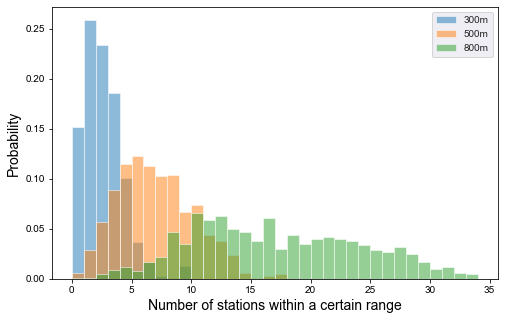

In [8]:
fig ,ax =plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
plt.hist(station_dist_df['300'],alpha=0.5,density=True,label="300m",stacked=True,bins=range(min(station_dist_df['300']), max(station_dist_df['300']) + 1, 1))
plt.hist(station_dist_df['500'],alpha=0.5,density=True,label="500m",stacked=True,bins=range(min(station_dist_df['500']), max(station_dist_df['500']) + 1, 1))
plt.hist(station_dist_df['800'],alpha=0.5,density=True,label="800m",stacked=True,bins=range(min(station_dist_df['800']), max(station_dist_df['800']) + 1, 1))
plt.xlabel('Number of stations within a certain range',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.legend()